# Shifting Carrier to the Software Industry

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating the QS</h1></div>

> #### _`QS:`_ People from different backgrounds shift to the software industry, how they do so and why? 
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
<br>

## Define shifting a carrier to the software industry

#### _`Definition:`_ A person is considered to have shifted to the software industry if he/she has a job in the software industry and has a degree in a field other than computer science/engineering.
#### We stated the CS/CE degree as a requirement to make sure that the person has a background in the software industry and stated the job in the software industry as a requirement to make sure that the person is currently working in the software industry.

>> We defined the list of the faculties that are considered to be in the software industry in the next cell.




In [97]:
CS_FACULTY = [
    'computer',
    'computing',
    'engineering',
    'information',
    'informatics',
    'software',
]

## Imports


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Data Exploration</h1></div>

## Read the Education data

In [100]:
education_df = pd.read_csv('../data/preprocessed-data/normalized csv/educations.csv')
print(education_df.shape)
education_df.head()

(1097, 6)


,University,Degree,Date,User,university_name,faculty_name
0,information technology institute (iti),nov 2021 - jun 2022,NaN,%D9%90%D9%90amiraelmergawy,#iti,NaN
1,ain shams university,"bachelor's degree, computer science",2016 - 2020,%D9%90%D9%90amiraelmergawy,ain shams,computer
2,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,-ezz,#iti,NaN
3,al-azhar university,geophysics and seismology,Sep 2015 - Aug 2019,-ezz,azhar,science
4,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,1212mohamedtaha,NaN,petroleum


## Read the Experiences data

In [101]:
experience_df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
print(experience_df.shape)
experience_df.head()

(3403, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,Teaching
1,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/15805726/,National Telecommunication Institute (NTI),mean stack developer,Internship,2020-11-01,Jan 2021,3.0,NaN,Fullstack
2,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/18305384/,الجهاز المركزي للتعبئة العامة و الاحصاء,software developer,Internship,2019-07-01,NaN,1.0,"Cairo, Egypt",Software
3,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/2205041/,(ISCC) Information Systems and Computers Center,software developer,Internship,2018-08-01,NaN,1.0,"Cairo, Egypt",Software
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",Software


## Filter Undergrads

In [102]:
experience_df = experience_df[(experience_df['title_tag'] != 'internship') & (experience_df['title_tag'] != 'Internship') & (experience_df['EmploymentType'] != 'Internship')]
experience_df = experience_df[(experience_df['title_tag'] != 'student')]
experience_df = experience_df[(experience_df['title_tag'] != 'Teaching') & (experience_df['title_tag'] != 'Lead')]
print(experience_df.shape)
experience_df.head()

(2596, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",Software
6,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,NaN
7,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",Data
9,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,NaN
10,3omarbadr,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,2022-09-01,Present,8.0,"Heliopolis, Cairo, Egypt",Software


## Get the Last Job of each User

In [103]:
# every user has one job
experience_df = experience_df.groupby('User').last().reset_index()
print(experience_df.shape)

experience_df.head()

(819, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,Software
1,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,Data
2,3omarbadr,https://www.linkedin.com/company/3302698/,Numinix Web Development Ltd,software engineer,Full-time,2022-01-01,Aug 2022,8.0,"Alexandria, Egypt",Software
3,a-mohsen,https://www.linkedin.com/company/553347/,Appspro,oracle paas trainee,Part-time,2018-04-01,Jun 2018,3.0,"Cairo Governorate, Egypt",Software
4,a-nan-farag-b78a0b12b,https://www.linkedin.com/company/6538816/,ITG EGYPT,full stack engineer,Full-time,2016-12-01,Apr 2018,17.0,Villa 8 Mohamed Al Gizawi St. the First Settle...,Fullstack


## Merge the data

In [104]:
# get first education
education_df = education_df.groupby('User').first().reset_index()

# join education and experience
working_df = pd.merge(education_df, experience_df, on='User', how='inner')
print("working_df", working_df.shape)

working_df (811, 15)


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ People from different backgrounds shift to the software industry, how they do so and why? 
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data to answer the question | _`Matches`_ |
>| ITI is the reason why people shift their carrier| - | - |
<br>




### In the [causal question notebook](./causal.ipynb), we proved that ITI is not the reason why people shift their carrier to the software industry and that there is no significant causal relationship between them.

> #### _`QS:`_ People from different backgrounds shift to the software industry, how they do so? 
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data to answer the question | _`Matches`_ |
>| ITI is the reason why people shift their carrier| Using our work in the [causal question notebook](./causal.ipynb) we rejected this hypothesis| ❌ Our initial expectation does not align with the data we have collected.**Most of the people who have shifted their carrier into the software industry didn't go to ITI.**|
>| Shifting carrier depends on the faculty you graduated from  | - | - |
<br>




##  The distribution of the users based on their faculty

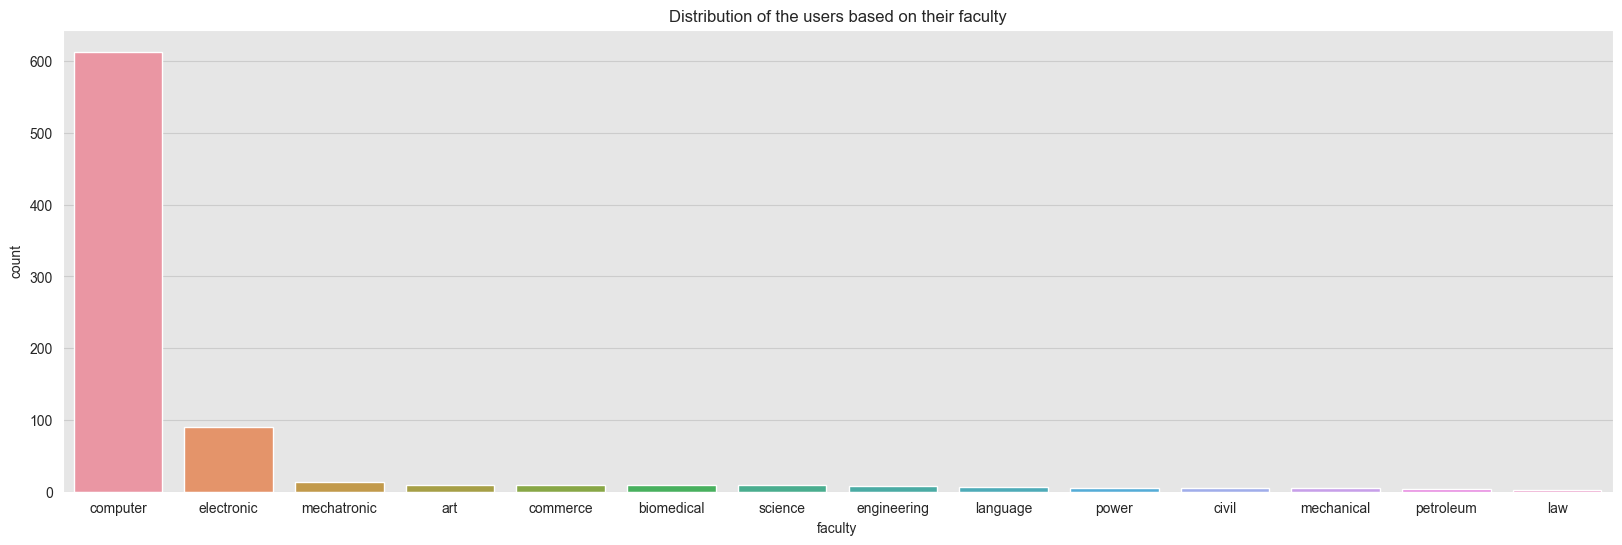

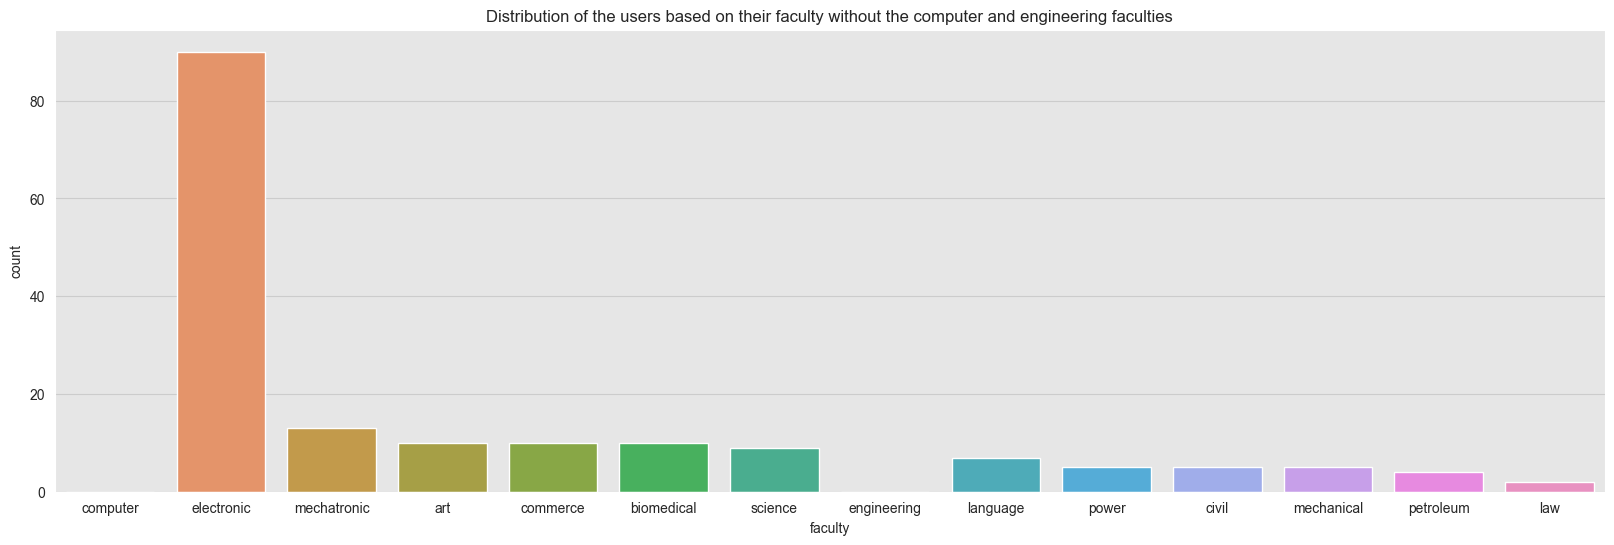

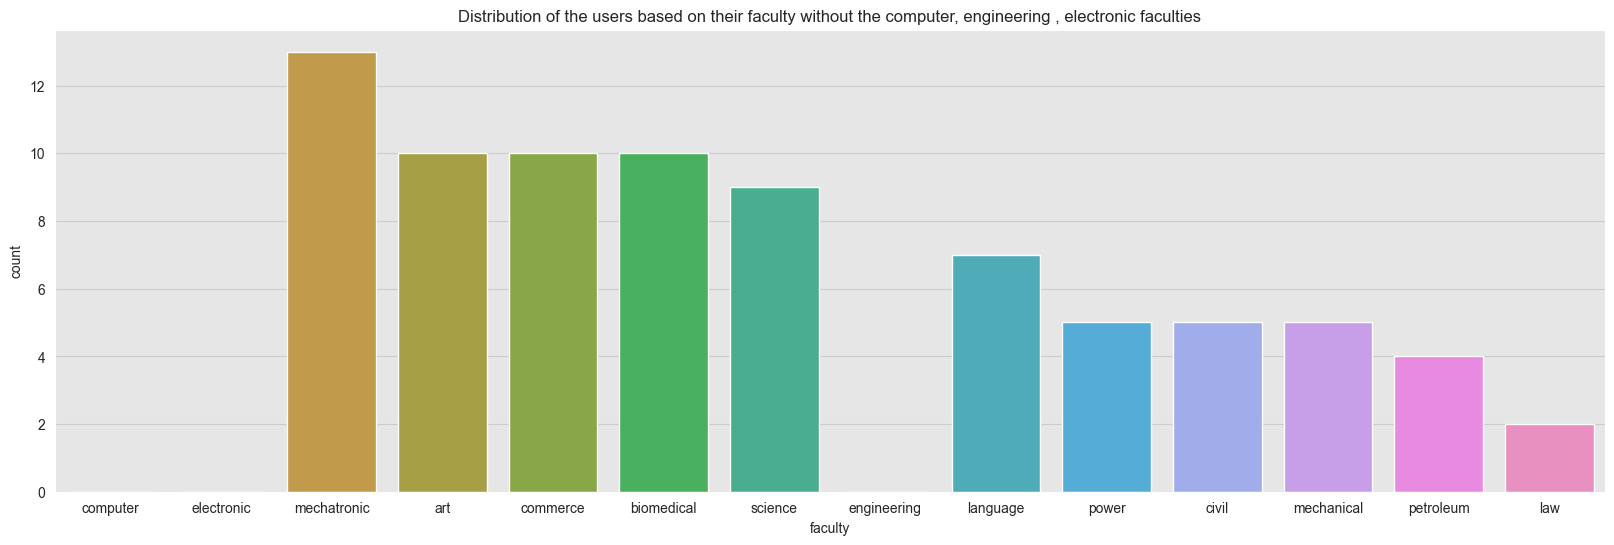

,User,University,Degree,Date,university_name,faculty_name,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,-ezz,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,#iti,science,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,Software
1,1212mohamedtaha,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,None,petroleum,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,Data
2,3omarbadr,information technology institute (iti),php full stack diploma,Mar 2021 - Aug 2021,#iti,computer,https://www.linkedin.com/company/3302698/,Numinix Web Development Ltd,software engineer,Full-time,2022-01-01,Aug 2022,8.0,"Alexandria, Egypt",Software
3,a-mohsen,ain shams university,"bachelor of engineering (b.eng.), computers an...",2013 - 2018,ain shams,computer,https://www.linkedin.com/company/553347/,Appspro,oracle paas trainee,Part-time,2018-04-01,Jun 2018,3.0,"Cairo Governorate, Egypt",Software
4,a-nan-farag-b78a0b12b,"al-azhar university , faculty of engineering","very good with honors, computers and systems",2011 - 2016,azhar,computer,https://www.linkedin.com/company/6538816/,ITG EGYPT,full stack engineer,Full-time,2016-12-01,Apr 2018,17.0,Villa 8 Mohamed Al Gizawi St. the First Settle...,Fullstack


In [105]:

# plot the distribution of the users based on their faculty
plt.figure(figsize=(20, 6))
# make the count plot sorted based on the count
sns.countplot(x='faculty_name', data=working_df, order=working_df['faculty_name'].value_counts().index)
plt.title('Distribution of the users based on their faculty')
plt.xlabel('faculty')
plt.ylabel('count')
plt.show()

# plot the distribution of the users based on their faculty without the computer and engineering faculties
plt.figure(figsize=(20, 6))
sns.countplot(x='faculty_name', data=working_df[~working_df['faculty_name'].isin(CS_FACULTY)], order=working_df['faculty_name'].value_counts().index)
plt.title('Distribution of the users based on their faculty without the computer and engineering faculties')
plt.xlabel('faculty')
plt.ylabel('count')
plt.show()

# plot the distribution of the users based on their faculty without the computer, engineering , electronic faculties
plt.figure(figsize=(20, 6))
sns.countplot(x='faculty_name', data=working_df[~working_df['faculty_name'].isin(CS_FACULTY + ['electronic'])], order=working_df['faculty_name'].value_counts().index)
plt.title('Distribution of the users based on their faculty without the computer, engineering , electronic faculties')
plt.xlabel('faculty')
plt.ylabel('count')
plt.show()

working_df.head()


## The distribution of the users who shifted to the software industry and those who was already in the software industry based on their faculty

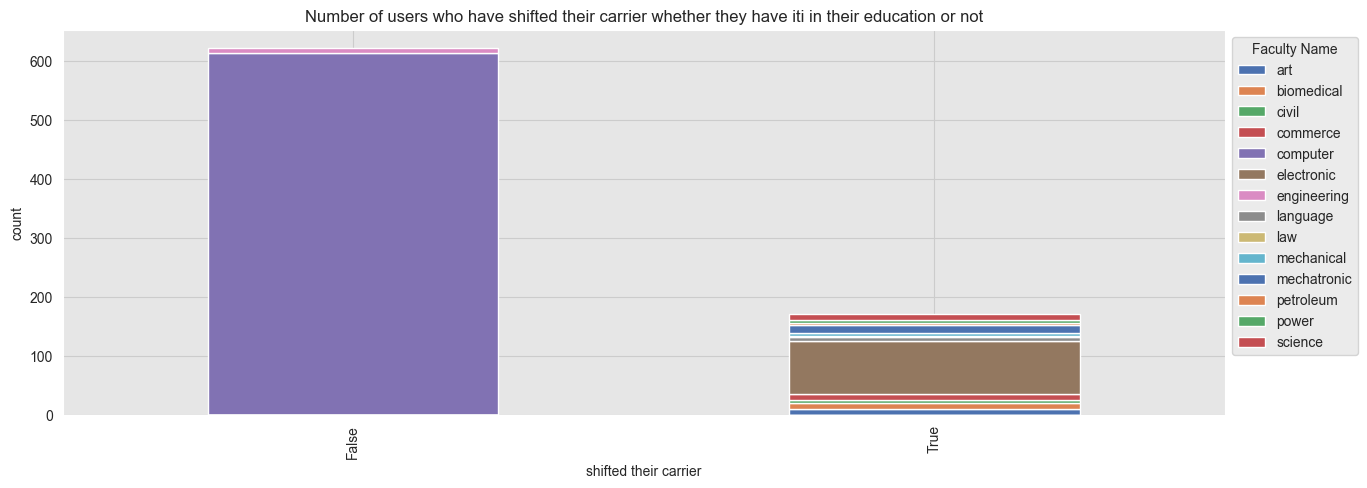

Number of users who have a related faculty in their education i.e. was already in the industry 621
Number of users who don't have a related faculty in their education i.e. shifted their carrier 190


,User,University,Degree,Date,university_name,faculty_name,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag,shifted
0,-ezz,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,#iti,science,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,Software,True
1,1212mohamedtaha,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,None,petroleum,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,Data,True
2,3omarbadr,information technology institute (iti),php full stack diploma,Mar 2021 - Aug 2021,#iti,computer,https://www.linkedin.com/company/3302698/,Numinix Web Development Ltd,software engineer,Full-time,2022-01-01,Aug 2022,8.0,"Alexandria, Egypt",Software,False
3,a-mohsen,ain shams university,"bachelor of engineering (b.eng.), computers an...",2013 - 2018,ain shams,computer,https://www.linkedin.com/company/553347/,Appspro,oracle paas trainee,Part-time,2018-04-01,Jun 2018,3.0,"Cairo Governorate, Egypt",Software,False
4,a-nan-farag-b78a0b12b,"al-azhar university , faculty of engineering","very good with honors, computers and systems",2011 - 2016,azhar,computer,https://www.linkedin.com/company/6538816/,ITG EGYPT,full stack engineer,Full-time,2016-12-01,Apr 2018,17.0,Villa 8 Mohamed Al Gizawi St. the First Settle...,Fullstack,False


In [106]:
# for working_df, add a new column called shifted, it's true if the user don't have a cs_graduate faculty in his faculty_name column and false otherwise
working_df['shifted'] = np.where(working_df['faculty_name'].str.contains('|'.join(CS_FACULTY), case=False, regex=True), False, True)


# Draw a stack plot to show the percentage each faculty_name and title_tag for the shifted_df
segment_counts = working_df.groupby(['shifted', 'faculty_name']).size().unstack()
# drop the did not specify column
# segment_counts = segment_counts.drop('did not specify', axis=1)
segment_counts.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Number of users who have shifted their carrier whether they have iti in their education or not')
plt.xlabel('shifted their carrier')
plt.ylabel('count')
plt.legend(title='Faculty Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


# print the number of users who have a related faculty in their education and the number of users who don't have a related faculty in their education
print("Number of users who have a related faculty in their education i.e. was already in the industry", len(working_df[working_df['shifted'] == False]))
print("Number of users who don't have a related faculty in their education i.e. shifted their carrier", len(working_df[working_df['shifted'] == True]))

working_df.head()


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpreting Results</h1></div>

As we can see, shifting the carrier depends on the faculty you graduated from. **Most of the people who have shifted their carrier into the software industry have graduated from an electronics major.** Which is the most relevant major to the software industry. We asked some of our collogues from the electronics major (i.e. convince sampling) for some reasons and these are the major ones:
- They have studied some programming courses in their major and became interested in the software industry.
- Due to the CS/CE majors acceptance criteria, they couldn't join the major.
-  There are some common courses between the electronics major and the CS/CE majors, like the embedded systems, computer architecture, and digital logic design. So, they have some background in the software industry.

On the other hand, for the rest of the majors, the prime reason for shifting their carrier to the software industry is the high salaries in the software industry compared to the average salaries in their original professions. We did the same convince sampling for some of our collogues from the rest of the majors and these are the major reasons:
- Software development generally offers good financial prospects, with the potential for high salaries and salary growth as one's skills and experience increase and -as we said- this is one of the prime reasons why people from this majors shift to the software industry. We concluded that because we did't find enough people from high paying professions such as the medical and military professions who shifted their carrier.
- The field of software development is full of daily challenges, which can be motivating for individuals as it prevents monotony and requires continuous problem-solving.
- Software development offers numerous job opportunities, even during challenging times in the market. There are chances to find better opportunities and positions that suit one's skills and aspirations.
- The software industry promotes mutual respect and does not involve hierarchy-based decision-making or controlling behavior.
- Unlike many other fields, software development does not have fixed monthly targets that must be achieved. It focuses more on the number of hours worked, allowing for flexibility and carrying over unfinished tasks.
- Both men and women, as well as individuals with disabilities, can pursue careers in software development. It provides the flexibility to work from any location and choose suitable working hours.
- The work in software development adds value to society by often aiming to improve people's lives and provide solutions to various challenges.
- Formal education in a specific field is not always a requirement to enter the software development industry.
- The essentials for working in software development are a computer and an internet connection, which are often provided by companies along with additional perks like breakfast, internet subscriptions, or entertainment services.
- Both introverts and extroverts can thrive in the field of software development.
- The software development field is built on principles and skills that can be learned and developed.
- The work in software development can stimulate the mind and provide a sense of fulfillment and satisfaction.
- There are opportunities to meet people from different cultures, either through travel or remote work with international companies.



> #### _`QS:`_ People from different backgrounds shift to the software industry, how they do so and why? 
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data to answer the question | _`Matches`_ |
>| ITI is the reason why people shift their carrier| Using our work in the [causal question notebook](./causal.ipynb) we rejected this hypothesis| ❌ Our initial expectation does not align with the data we have collected.**Most of the people who have shifted their carrier into the software industry didn't go to ITI.**|
>| Some software fields are attractive to people from specific professions, that helps them in shifting their carrier  | -  | - |
<br>




## Distribution of the software field in our data

Software     289
Fullstack     66
IT            62
Mobile        61
Frontend      60
AI            53
Embedded      44
Data          43
Backend       40
QA            34
Student       19
DevOps        17
UI/UX          6
Game           5
Security       1
Name: title_tag, dtype: int64


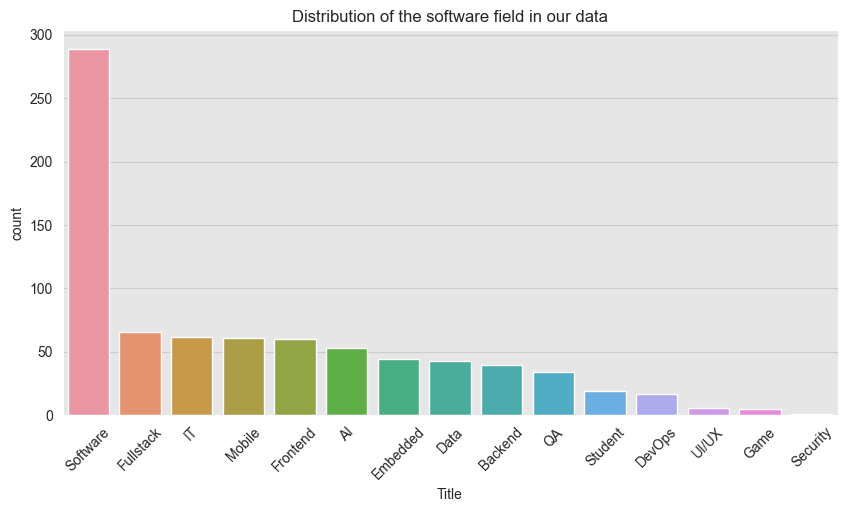

In [107]:

print(working_df['title_tag'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(x='title_tag', data=working_df, order=working_df['title_tag'].value_counts().index)
plt.title('Distribution of the software field in our data')
plt.xticks(rotation=45)
plt.xlabel('Title')
plt.show()


## Distribution of the software field for those who shifted their career

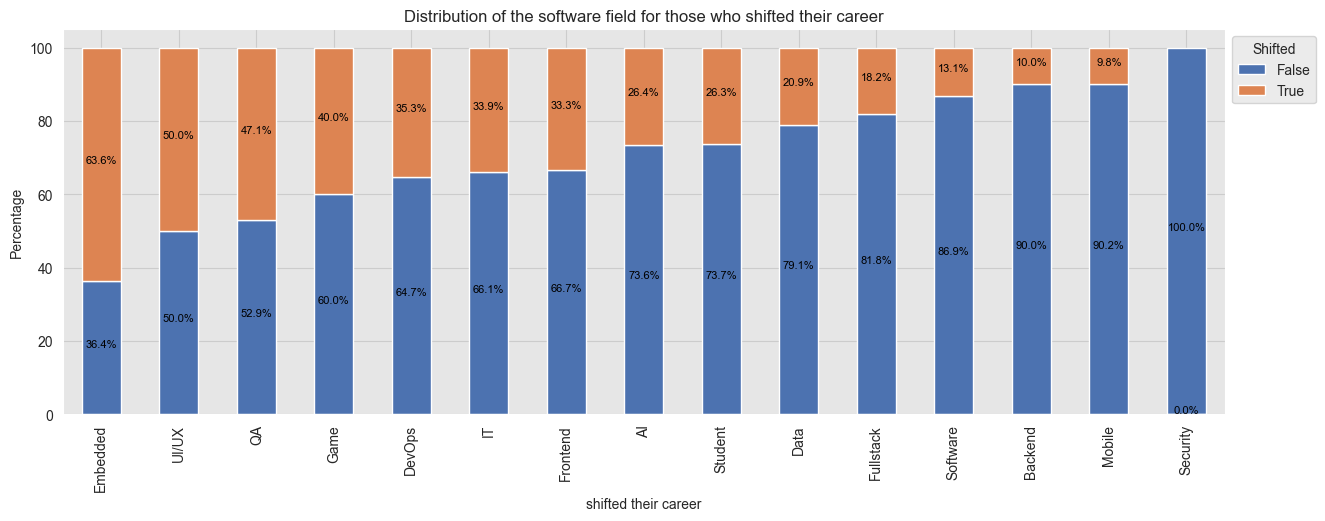

In [108]:
# Draw a stack plot to show the percentage each faculty_name and title_tag for the shifted_df
segment_counts = working_df.groupby(['title_tag', 'shifted']).size().unstack()

# Calculate the percentages
segment_percents = segment_counts.div(segment_counts.sum(axis=1), axis=0) * 100

# Order segment_percents based on shifted = True
segment_percents = segment_percents.sort_values(by=True, ascending=False)

# Plot the stacked bar chart with percentages
ax = segment_percents.plot(kind='bar', stacked=True, figsize=(15, 5))

# Add percentage labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black', fmt='%.1f%%', padding=3)

plt.xlabel('shifted their career')
plt.ylabel('Percentage')
plt.title('Distribution of the software field for those who shifted their career')
plt.legend(title='Shifted', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


## Distribution of the software field for those who shifted their carrier based on the faculty

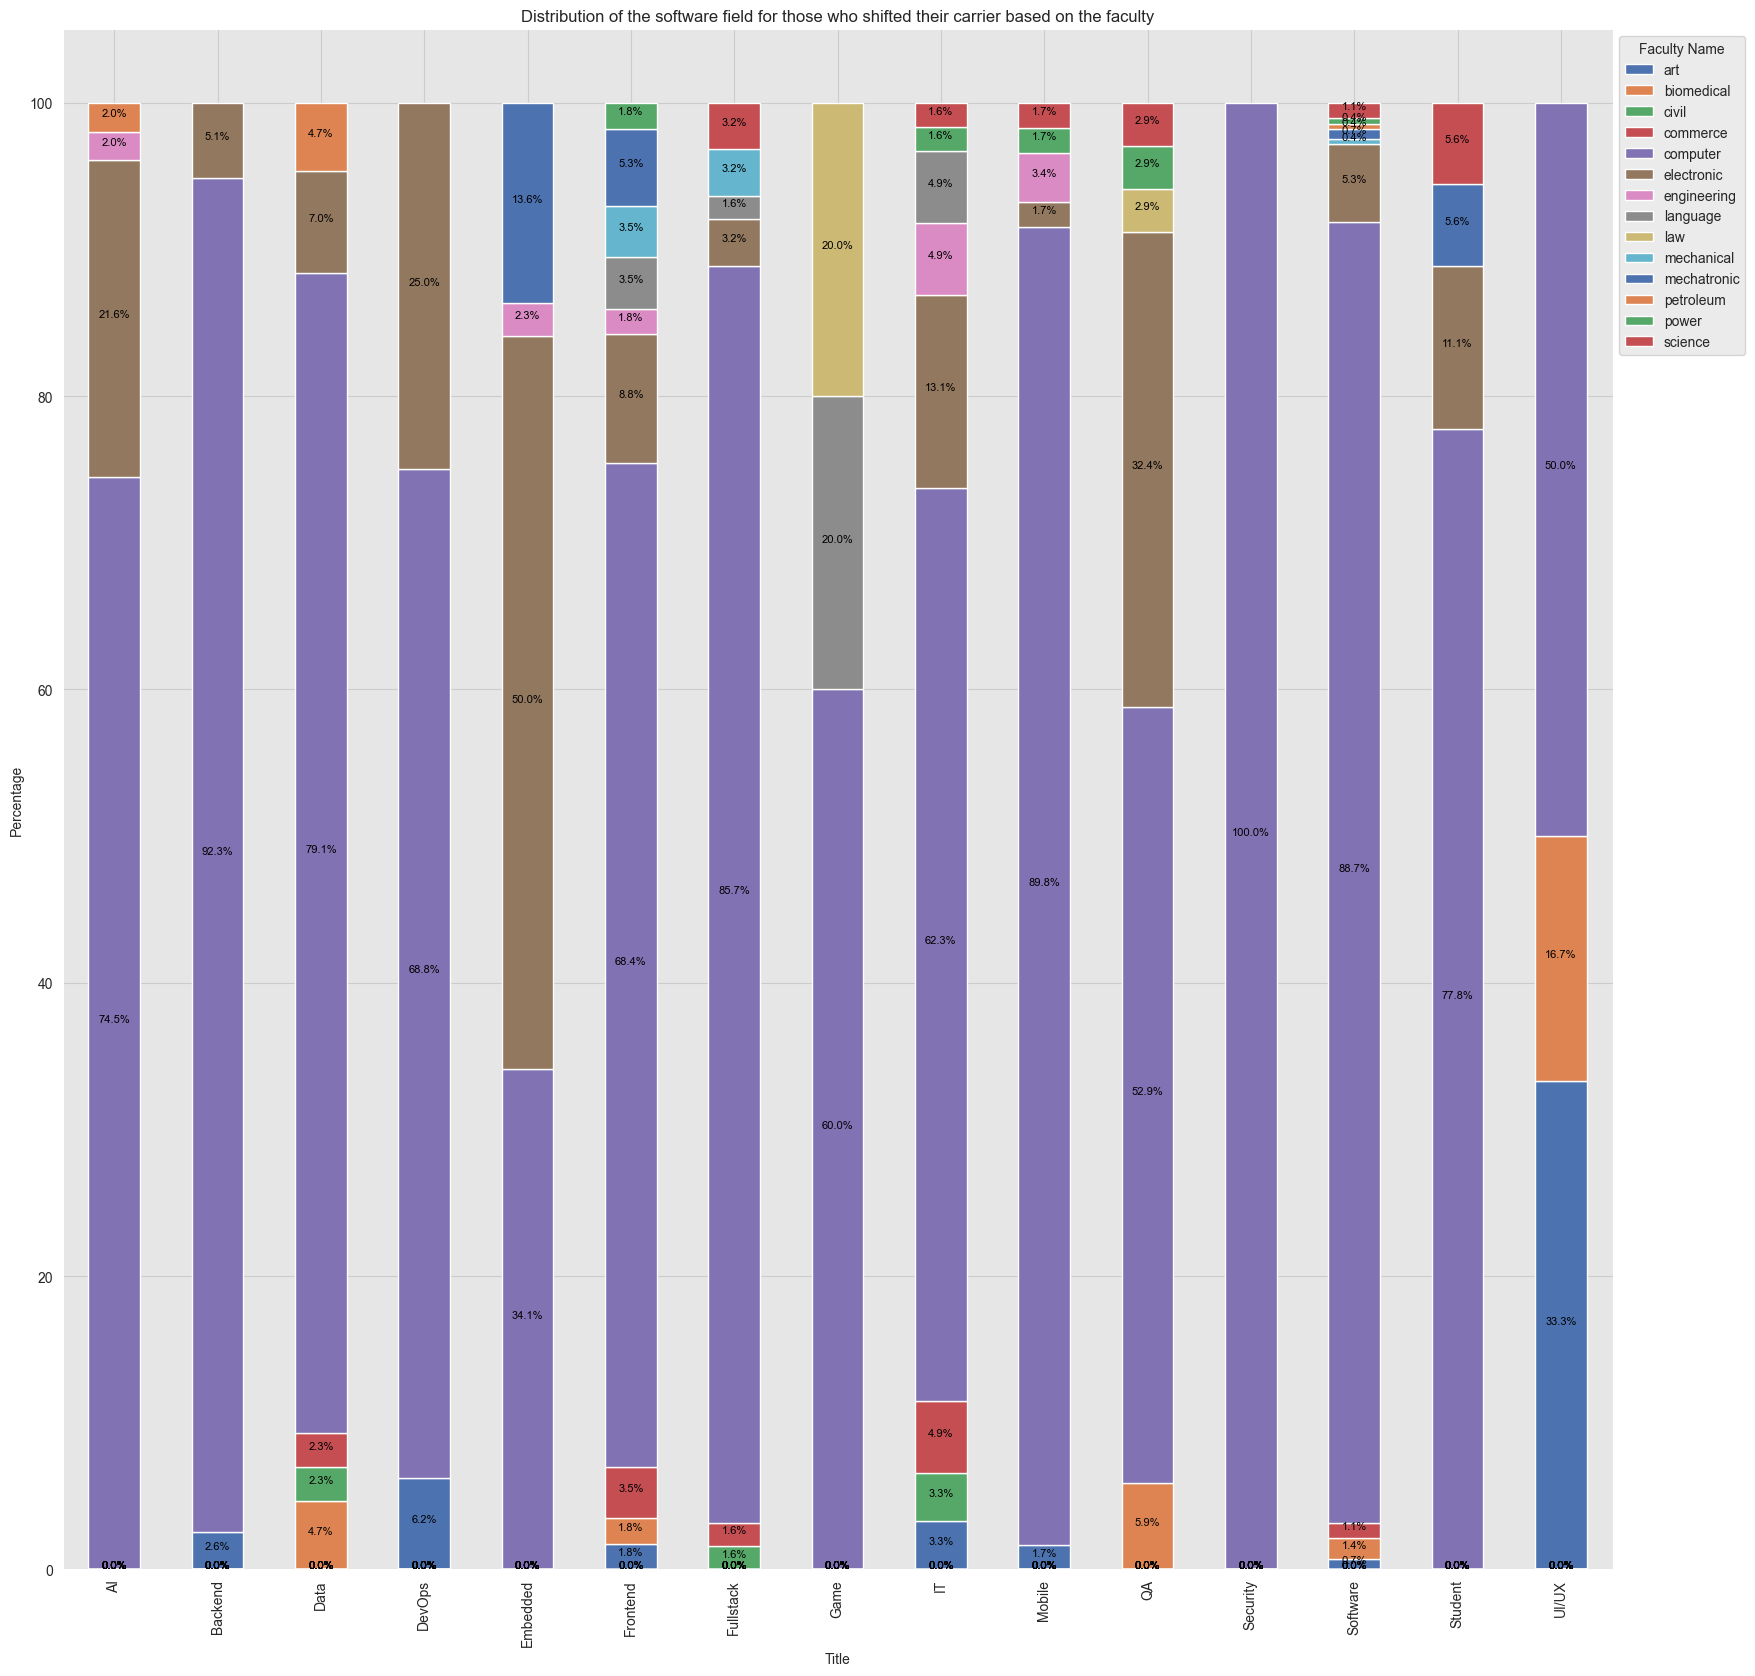

In [ ]:
# Draw a stack plot to show the percentage each faculty_name and title_tag for the shifted_df
segment_counts = working_df.groupby(['title_tag', 'faculty_name']).size().unstack()

# if the count of a title_tag is less than n, drop it
n = 0
segment_counts = segment_counts.drop(segment_counts[segment_counts.sum(axis=1) < n].index, axis=0)

# Calculate the percentages
segment_percents = segment_counts.div(segment_counts.sum(axis=1), axis=0) * 100

# Order segment_percents based on shifted = True
segment_counts = segment_counts.reindex(segment_counts.sum().sort_values(ascending=True).index, axis=1)

# Plot the stacked bar chart with percentages
ax = segment_percents.plot(kind='bar', stacked=True, figsize=(20, 20))

# Add percentage labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black', fmt='%.1f%%', padding=3)


plt.xlabel('Title')
plt.ylabel('Percentage')
plt.title('Distribution of the software field for those who shifted their carrier based on the faculty')
plt.legend(title='Faculty Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpreting Results</h1></div>

We can notice that some fields are attractive to people from other professions to shift to. **Most of the people who have shifted their carrier into the software industry have shifted to the Embedded Systems, UI/UX, and QA.** We asked some of our collogues from the software industry (i.e. convince sampling) for some reasons and these are the major ones:
- For the embedded systems, it seemed to be very attractive to people from other engineering backgrounds, like the electronics and the communications engineering, medical engineering, and mechanical engineering. The reason is that the embedded systems field is a combination of hardware and software, that made very attractive to people from other engineering backgrounds.
- For the UI/UX, it seemed to be very attractive to people from other design backgrounds, like the graphic design and the product design. The reason is that the UI/UX field is a combination of design and software, that made very attractive to people from other design backgrounds. It's one of the few fields that doesn't require a lot of technical knowledge or preparation to get into.
- For the QA, it seemed to be attractive as it's one of the few fields that doesn't require a lot of technical knowledge or preparation to get into. Also, it's a very important field in the software industry and it's very demanded.
  
There were other reasons for the rest of the fields, like the high salaries, the high demand, and the flexibility of the work as we mentioned before.

> #### _`QS:`_ People from different backgrounds shift to the software industry, how they do so and why? 
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data to answer the question | _`Matches`_ |
>| ITI is the reason why people shift their carrier| Using our work in the [causal question notebook](./causal.ipynb) we rejected this hypothesis| ❌ Our initial expectation does not align with the data we have collected.**Most of the people who have shifted their carrier into the software industry didn't go to ITI.**|
>| Some software fields are attractive to people from other professions to shift to  | We managed to showed that Some software fields are attractive to people from other professions to shift to and explained the reasons for this  | _`Matches`_  |
>| ITI helped people to shift to these professions and they had some advantage over CS/CE graduates| - | - |
<br>




### In the [causal question notebook](./causal.ipynb), We demonstrated that ITI assists people in transitioning to some jobs more than others, and they already had an advantage over CS/CE grads because most of these professions are not taught in our CS/CE courses.

> #### _`QS:`_ People from different backgrounds shift to the software industry, how they do so? 
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data to answer the question | _`Matches`_ |
>| ITI is the reason why people shift their carrier| Using our work in the [causal question notebook](./causal.ipynb) we rejected this hypothesis| ❌ Our initial expectation does not align with the data we have collected.**Most of the people who have shifted their carrier into the software industry didn't go to ITI.**|
>| Some software fields are attractive to people from other professions to shift to  | We managed to showed that Some software fields are attractive to people from other professions to shift to and explained the reasons for this  | _`Matches`_  |
>| ITI helped people to shift to these professions and they had some advantage over CS/CE graduates| Using our work in the [causal question notebook](./causal.ipynb) we proved this hypothesis | _`Matches`_ |
<br>




<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpreting Results</h1></div>

### In the [causal question notebook](./causal.ipynb), it was proven that there is no significant causal relationship between ITI and people shifting their career to the software industry. Shifting careers to the software industry seems to depend on the faculty individuals graduated from, with a majority of those who shifted their careers having graduated from an electronics major. The reasons for this include studying programming courses in their major, being unable to join CS/CE majors due to acceptance criteria, and having a background in the software industry through common courses. For individuals from other majors, the primary reason for shifting to the software industry is the high salaries offered compared to their original professions. Other factors include the potential for high salary growth, daily challenges that prevent monotony, numerous job opportunities, a culture of mutual respect, flexibility in work hours and location, adding value to society, not requiring formal education in a specific field, and providing fulfillment and satisfaction. Some fields, such as Embedded Systems, UI/UX, and QA, are particularly attractive for individuals from other professions to shift to within the software industry. This is due to their combination of hardware and software (embedded systems), design and software (UI/UX), and the accessibility of the field (QA). Additionally, high salaries, high demand, and work flexibility are common reasons across different fields. The [causal question notebook](./causal.ipynb) also demonstrated that ITI assists people in transitioning to specific jobs, providing an advantage over CS/CE graduates in professions not typically taught in CS/CE courses.